# Importing basic Libraries

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_columns', 270)
pd.set_option('max_rows', 20)

In [2]:
# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Loading Data

In [3]:
df = pd.read_csv("event_data_subset.csv")
df.head()

,manufacturer_contact_zip_ext,manufacturer_g1_address_2,event_location,report_to_fda,manufacturer_contact_t_name,manufacturer_contact_state,manufacturer_link_flag,manufacturer_contact_address_2,manufacturer_g1_city,manufacturer_contact_address_1,manufacturer_contact_pcity,event_type,report_number,type_of_report,product_problem_flag,date_received,manufacturer_address_2,pma_pmn_number,date_of_event,reprocessed_and_reused_flag,manufacturer_address_1,report_date,exemption_number,manufacturer_contact_zip_code,reporter_occupation_code,manufacturer_contact_plocal,manufacturer_contact_l_name,source_type,distributor_zip_code_ext,manufacturer_g1_postal_code,date_facility_aware,manufacturer_g1_state,reporter_country_code,manufacturer_contact_area_code,date_added,manufacturer_contact_f_name,previous_use_code,device,manufacturer_zip_code,manufacturer_contact_country,date_changed,health_professional,summary_report_flag,manufacturer_g1_zip_code_ext,manufacturer_contact_extension,manufacturer_city,manufacturer_contact_phone_number,patient,distributor_city,date_report,initial_report_to_fda,distributor_state,event_key,manufacturer_g1_country,date_report_to_manufacturer,manufacturer_contact_city,mdr_report_key,removal_correction_number,number_devices_in_event,date_report_to_fda,manufacturer_name,report_source_code,remedial_action,manufacturer_g1_zip_code,report_to_manufacturer,manufacturer_zip_code_ext,manufacturer_g1_name,adverse_event_flag,distributor_address_1,manufacturer_state,distributor_address_2,manufacturer_postal_code,single_use_flag,manufacturer_country,mdr_text,number_patients_in_event,distributor_name,manufacturer_g1_address_1,distributor_zip_code,manufacturer_contact_postal_code,manufacturer_contact_exchange,manufacturer_contact_pcountry,device_date_of_manufacturer,date_manufacturer_received,product_problems,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 

# 1) Exploratory Data Analysis

### a) Year of Highest Adverse Event

In [4]:
# Date is in float format. let's extract year from date
def get_year(x):
    if x != np.nan and type(x) != str:
        x = str(x)
        x = x[0:4]
        return x
    else:
        return np.nan

# Getting Adverse event data
adverse_event_df = df[((df.event_type == "Injury") | (df.event_type == "Death"))]
# Applying function
years_of_event = adverse_event_df.date_of_event.apply(get_year)
# Remove NAN
years_of_event.drop(years_of_event[years_of_event == "nan"].index, inplace=True)

In [5]:
# Per year records
years_of_event.value_counts()

2008    1089
2004    1032
2006     779
1993     706
2007     647
        ... 
1976       2
1959       1
2020       1
1965       1
1969       1
Name: date_of_event, Length: 44, dtype: int64

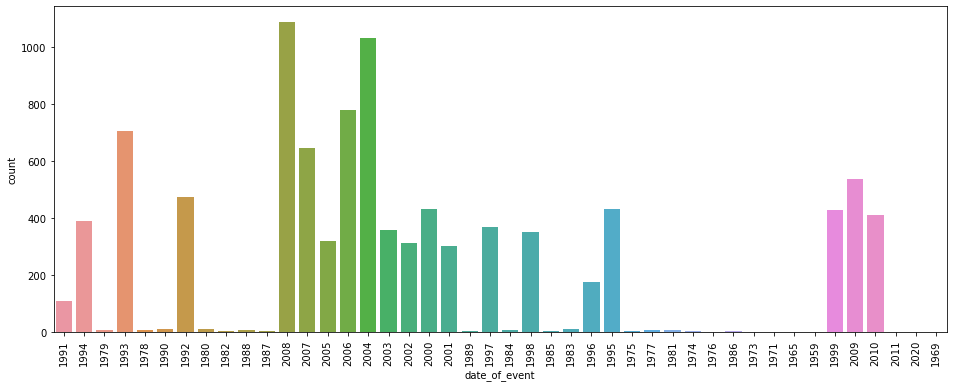

In [6]:
plt.figure(figsize=(16, 6))
sns.countplot(years_of_event)
plt.xticks(rotation=90)
plt.show()

From this record and per year values we can see that highest number of recorded adverse events were in 2008.

### b) Device with Highest Adverse Event (Injury)

In [7]:
# Getting Device/Product Code
def get_code(x):
    x = x[19:22]
    return x

# Getting Adverse event data
adverse_event_df = df[(df.event_type == "Injury")]
# Applying function
prod_code = adverse_event_df.device.apply(get_code)
# Dropping records where device code is not present
prod_code.drop(prod_code[prod_code == ", i"].index, inplace=True)

In [8]:
prod_code.value_counts()

176    39
215    35
146    34
154    33
322    29
       ..
375     1
879     1
764     1
538     1
960     1
Name: device, Length: 790, dtype: int64

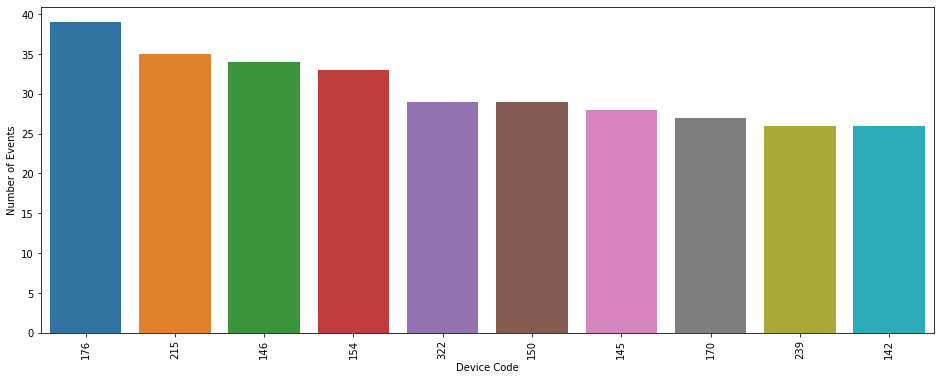

In [9]:
index, data = prod_code.value_counts()[0:10].index, prod_code.value_counts()[0:10].values
plt.figure(figsize=(16, 6))
sns.barplot(x=index, y=data)
plt.xticks(rotation=90)
plt.xlabel("Device Code")
plt.ylabel("Number of Events")
plt.show()

### c) Trends on Device Category

In [10]:
df_copy = df[['date_of_event', 'device']]
df_copy.head()

,date_of_event,device
0,19911207.0,"[{device_event_key=127, implant_flag=N, date_r..."
1,19911214.0,"[{device_event_key=180, implant_flag=N, date_r..."
2,19911126.0,"[{device_event_key=362, implant_flag=Y, date_r..."
3,19911218.0,"[{device_event_key=330, implant_flag=N, date_r..."
4,19911220.0,"[{device_event_key=124, implant_flag=N, date_r..."


In [11]:
# Date is in float format. So, let's extract year from date
def get_date(x):
    if x != np.nan and type(x) != str:
        x = pd.to_datetime(x)
        return x
    else:
        return np.nan

df_copy.date_of_event = df_copy.date_of_event.apply(get_year)
df_copy.device = df_copy.device.apply(get_code)

In [12]:
# Remove NAN
df_copy.drop(df_copy[df_copy.device == ", i"].index, inplace=True)
df_copy.drop(df_copy[df_copy.date_of_event == "nan"].index, inplace=True)

In [13]:
def make_number(x):
    try:
        x = int(x)
        return x
    except:
        return 0

df.device = df_copy.device.apply(make_number)

In [14]:
df_copy.set_index("date_of_event")

,device
date_of_event,
1991,127
1991,180
1991,362
1991,330
1991,124
...,...
1992,606
1993,608
1993,632


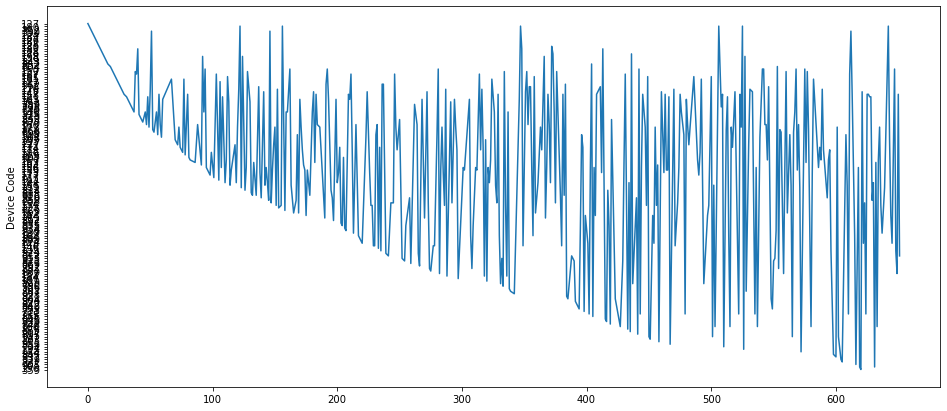

In [23]:
plt.figure(figsize=(16, 7))
sns.lineplot(x=df_copy.index[0:500], y=df_copy.device[0:500])
plt.ylabel("Device Code")
plt.xticks()
plt.show()

From this line graph we can see there is a decreasing trend in event frequency. We can say this with high confidence.

# 2) Bonus - What you can do with text data in mdr_text field?

We can clean it up to get the main words present in the data. Then we can do a lot of things like tokenization, vectorizing, sentiment analysis or make a word cloud to get the words that are repeated the most in the text.

In [17]:
# Function to extract the text from the mdr field
def get_description(x):
    start = x.find("text=") + 5
    end = x.find("  PATIENT MEDICAL STATUS PRIOR TO EVENT:")
    x = x[start:end]
    x = re.sub(' +', ' ', x)
    return x

In [18]:
text = df.mdr_text.apply(get_description)
text

0        PATIENT WITH MYASTHENIA GRAVIS DEVELOPED RESPI...
1        WHILE ATTEMPTING TO PUT FEEDING INTO TUBE, THE...
2        END PORTION OF UMBRELLA CATHETER SEPERATED AND...
3        A CASE WAS PERFORMED ON PATIENT AT 1048. A HEM...
4        PT FOUND IN FLOOR. AFTER NURSE ENTERED ROOM FI...
                               ...                        
29996                   THE "SPRING OR ROLLER IS BROKEN".}
29997    CUSTOMER CALLED TO REPORT THE DEVICE HAD NO DE...
29998    PT'S SPOUSE CALLED LFS ALLEGING THAT PT'S METE...
29999    A PATIENT IS SEEING A TEMPORAL DARK SHADOW 1 1...
30000    CO RECEIVED A LETTER FROM DR. ADVISING THAT TH...
Name: mdr_text, Length: 30001, dtype: object

In [19]:
def plot_wordcloud(text):
  from wordcloud import WordCloud, STOPWORDS
  # Generating WordCloud
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in text:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 1200, height = 700, background_color ='black',
          stopwords = stopwords,
          min_font_size = 10).generate(comment_words)

  # plot the WordCloud image
  plt.figure(figsize = (12, 7), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

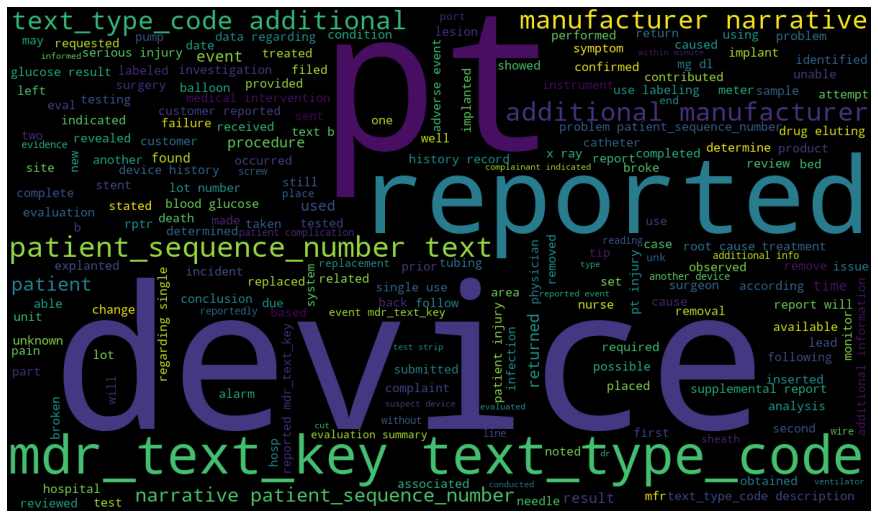

In [20]:
# Wordcloud for unclean data
plot_wordcloud(text)

From this word cloud we can see that the repeated words are mostly related to hospital terminologies.